In [1]:
# importing libraries for ProjectGurukul ML Customer Segmentation Project:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# read the dataset:
df = pd.read_csv('Data_Bot.csv')

In [3]:
#to display the content
df_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [5]:
# shape of our dataset: 
df_dataset.shape

(406829, 9)

In [6]:
# statistical analysis of our dataset: 
customer_dataset.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [9]:
# Checking type of columns present in our dataset: 
customer_dataset.dtypes 

# Checking number of rows and columns present in the dataset: 
customer_dataset.info() 

# check any null values present in the dataset:
customer_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int64  
 7   Country      406829 non-null  object 
 8   Sales        406829 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 27.9+ MB


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Sales          0
dtype: int64

In [10]:
# drop the CustomerID column:

customer_dataset.drop(['CustomerID'], axis = 1, inplace= True)

# checking the modified dataset:

customer_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom,20.34


In [14]:
# Print the first few rows of the data
print(df.head())

# Calculate the total number of purchases
num_purchases = df.shape[0]
print('Total number of purchases:', num_purchases)

# Calculate the total revenue
total_revenue = df['Quantity'].sum()
print('Total revenue:', total_revenue)

# Calculate the average purchase price
avg_purchase_price = total_revenue / num_purchases
print('Average purchase price:', avg_purchase_price)

# Calculate the number of unique customers
num_customers = df['CustomerID'].nunique()
print('Number of unique customers:', num_customers)

# Calculate the most popular item
popular_item = df['Description'].mode()[0]
print('Most popular item:', popular_item)

# Calculate the total revenue by item
revenue_by_item = df.groupby('Description')['Quantity'].sum()
print('Revenue by item:\n', revenue_by_item)

# Calculate the total revenue by customer
revenue_by_customer = df.groupby('CustomerID')['Quantity'].sum()
print('Revenue by customer:\n', revenue_by_customer)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  Sales  
0  12/1/2010 8:26       2.55       17850  United Kingdom  15.30  
1  12/1/2010 8:26       3.39       17850  United Kingdom  20.34  
2  12/1/2010 8:26       2.75       17850  United Kingdom  22.00  
3  12/1/2010 8:26       3.39       17850  United Kingdom  20.34  
4  12/1/2010 8:26       3.39       17850  United Kingdom  20.34  
Total number of purchases: 406829
Total revenue: 4906888
Average purchase price: 12.06130339774205
Number of unique customers: 4372
Most popular item: WHITE HANGING HEART 

In [15]:
demography = df.groupby('Country').size()

<AxesSubplot:xlabel='Country'>

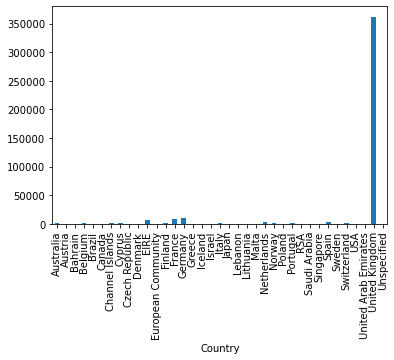

In [16]:
demography.plot(kind='bar')

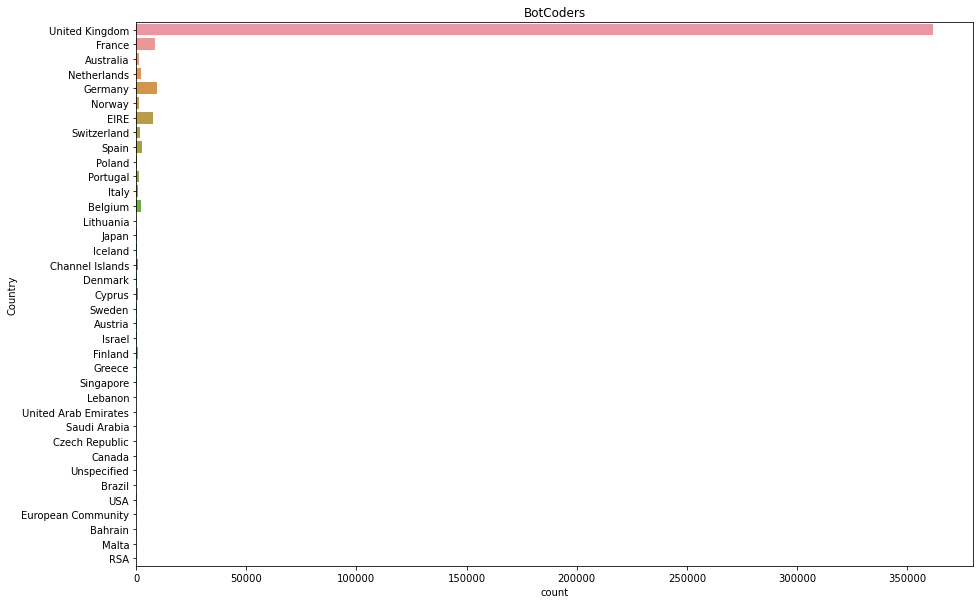

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(y = 'Country' , data = customer_dataset)
plt.title('BotCoders')
plt.show()

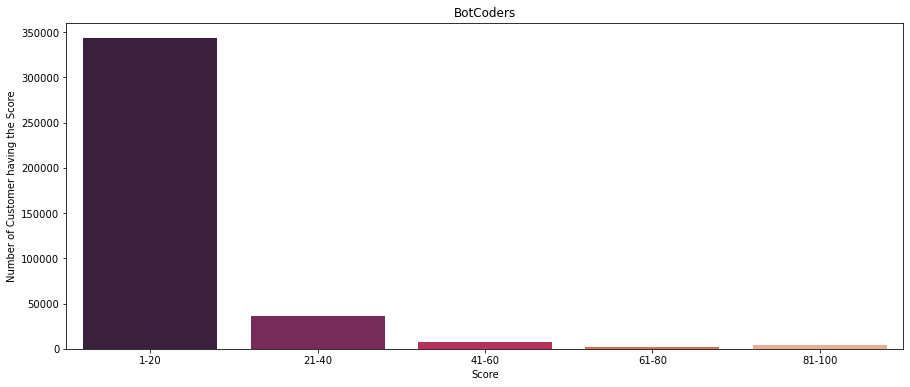

In [19]:
# Creating groups of ‘Spending Score’ column and visualizing it:
ss_1_20 = customer_dataset['Quantity'][(customer_dataset['Quantity'] >= 1) & (customer_dataset['Quantity'] <= 20)]
ss_21_40 = customer_dataset['Quantity'][(customer_dataset['Quantity'] >= 21) & (customer_dataset['Quantity'] <= 40)]
ss_41_60 = customer_dataset['Quantity'][(customer_dataset['Quantity'] >= 41) & (customer_dataset['Quantity'] <= 60)]
ss_61_80 = customer_dataset['Quantity'][(customer_dataset['Quantity'] >= 61) & (customer_dataset['Quantity'] <= 80)]
ss_81_100 = customer_dataset['Quantity'][(customer_dataset['Quantity'] >= 81) & (customer_dataset['Quantity'] <= 100)]

ssx = ['1-20','21-40','41-60','61-80','81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = ssx, y = ssy, palette='rocket')
plt.title('BotCoders')
plt.xlabel('Score')
plt.ylabel('Number of Customer having the Score')
plt.show()